<a href="https://colab.research.google.com/github/Rahulx911/grid-6.0/blob/main/object_dectetion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

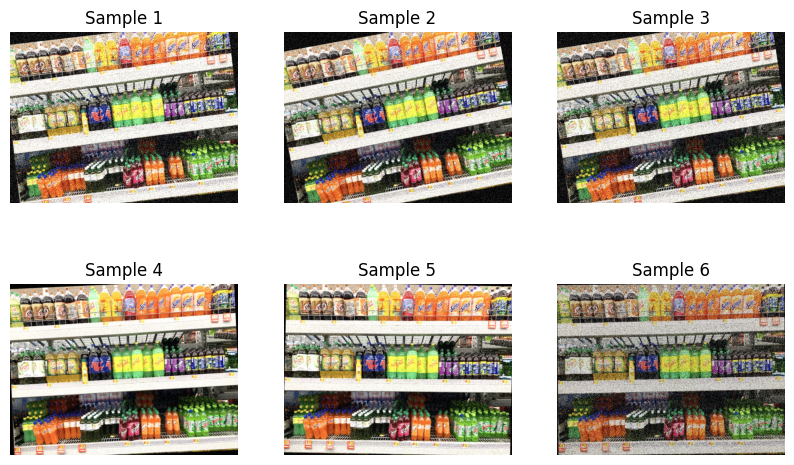

100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




0: 480x640 1 bench, 5 bottles, 318.8ms
Speed: 10.9ms preprocess, 318.8ms inference, 27.9ms postprocess per image at shape (1, 3, 480, 640)
Sample 1 - Detected 6 objects



In [ ]:
# Install YOLOv8: pip install ultralytics imgaug
!pip install ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
from PIL import Image
import os

# Initialize variables
dataset_folder = "./labeled_dataset/"
image_folder = os.path.join(dataset_folder, "images/")
label_folder = os.path.join(dataset_folder, "labels/")

# Create directories for the dataset
os.makedirs(image_folder, exist_ok=True)
os.makedirs(label_folder, exist_ok=True)

# Load the uploaded image file for object detection
object_image_path = '/content/Screenshot 2024-10-04 at 9.32.07 PM.png'
object_image = Image.open(object_image_path)
object_image = np.array(object_image.resize((640, 480)))  # Resize for YOLO model

# Convert the image to RGB if it has an alpha channel
if object_image.shape[2] == 4:
    object_image = cv2.cvtColor(object_image, cv2.COLOR_RGBA2RGB)

# Augmentor to create variations of the image (simulate different conditions)
augmentor = iaa.Sequential([
    iaa.Affine(rotate=(-15, 15)),  # Slight rotations
    iaa.AdditiveGaussianNoise(scale=(10, 50)),  # Add Gaussian noise
    iaa.Multiply((0.8, 1.2)),  # Adjust brightness
])

# Function to simulate data labeling (normally done manually)
def simulate_labeling(image_idx, object_count):
    # Label format: class_id center_x center_y width height (normalized)
    labels = []
    for obj_id in range(object_count):
        class_id = 0  # Assuming one class, e.g., 'bottle'
        center_x = np.random.uniform(0.3, 0.7)  # Simulate object center in the middle
        center_y = np.random.uniform(0.3, 0.7)
        width = np.random.uniform(0.1, 0.2)  # Simulate random object width
        height = np.random.uniform(0.1, 0.2)  # Simulate random object height

        # Append the label
        labels.append(f"{class_id} {center_x:.6f} {center_y:.6f} {width:.6f} {height:.6f}\n")

    # Write the label to a corresponding .txt file
    with open(f"{label_folder}image_{image_idx}.txt", 'w') as label_file:
        label_file.writelines(labels)

# Generate a dataset of 60 images with augmentations
dataset = []
for i in range(60):
    augmented_image = augmentor(image=object_image)

    # Ensure the augmented image is also in RGB format
    if augmented_image.shape[2] == 4:
        augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGBA2RGB)

    dataset.append(augmented_image)

    # Save each augmented image
    cv2.imwrite(f"{image_folder}image_{i}.jpg", cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

    # Simulate labeling with random object counts
    simulated_object_count = np.random.randint(1, 10)  # Simulate random object count between 1 and 10
    simulate_labeling(i, simulated_object_count)

# Display a sample of the dataset (first 6 images)
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(dataset[i])
    plt.title(f"Sample {i+1}")
    plt.axis('off')
plt.show()

# Load a pre-trained YOLOv8 model (you can train your own if needed)
model = YOLO('yolov8n.pt')  # Load YOLOv8 small model for object detection

# Function to run YOLOv8 for object detection and counting
def detect_and_count_objects(image):
    # Perform object detection
    results = model.predict(source=image, show=True)

    # Get object detection results
    detections = results[0].boxes.xyxy  # Bounding box coordinates for detected objects
    return len(detections)  # Return the count of detected objects

# Run YOLOv8 detection on the dataset and count the objects
for i, image in enumerate(dataset[:3]):  # Test on first 3 samples
    count = detect_and_count_objects(image)
    print(f"Sample {i+1} - Detected {count} objects")

# You can also save the results, modify the counting logic, or display them as needed.


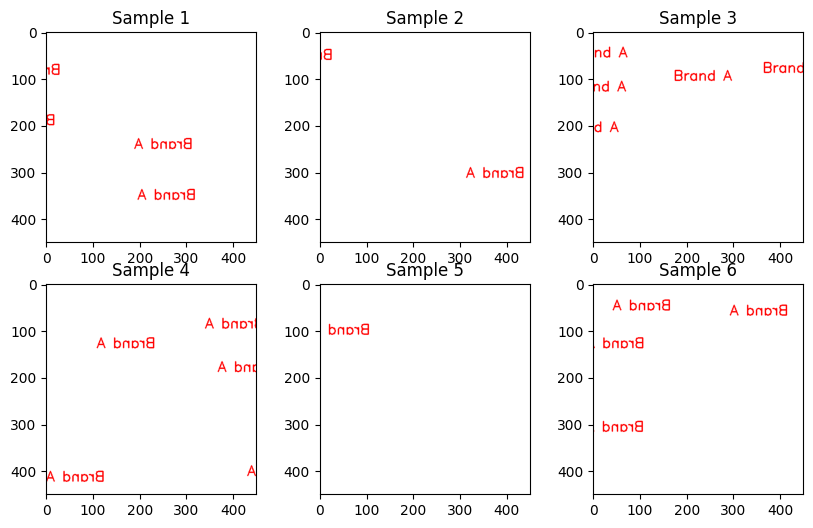

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


0: 640x640 3 kites, 280.3ms
Speed: 12.7ms preprocess, 280.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Sample 1 - Detected 3 items



In [ ]:
# Install YOLOv8: pip install ultralytics albumentations
from ultralytics import YOLO
import cv2
import numpy as np
import albumentations as A
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt


# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Load YOLOv8 small model for object detection

# Generate Synthetic Image for Counting
def generate_synthetic_product_image(item_name, count, width=640, height=480):
    image = np.ones((height, width, 3), dtype="uint8") * 255
    for i in range(count):
        x, y = np.random.randint(50, width-50), np.random.randint(50, height-50)
        cv2.putText(image, item_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)
    return image

# Augmenting the synthetic image using Albumentations
augmentation_pipeline = A.Compose([
    A.RandomCrop(width=450, height=450),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Blur(blur_limit=3, p=0.1)
])

# Generate a dataset of 60 images with products
dataset = []
for i in range(60):
    synthetic_image = generate_synthetic_product_image("Brand A", count=np.random.randint(1, 6))
    augmented_image = augmentation_pipeline(image=synthetic_image)['image']
    dataset.append(augmented_image)

# Display a sample of the dataset
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(dataset[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Sample {i+1}")
plt.show()

# Fine-tune YOLOv8 on your custom dataset
# model.train(data='path/to/your/custom_dataset.yaml', epochs=50, batch_size=16, imgsz=640, lr0=1e-4)

# Run YOLOv8 for detection and counting on the dataset
for i, image in enumerate(dataset[:3]):  # Test on 3 samples
    results = model.predict(source=image, show=True)
    detections = results[0].boxes.xyxy
    print(f"Sample {i+1} - Detected {len(detections)} items")



0: 480x640 33 bottles, 294.8ms
Speed: 5.2ms preprocess, 294.8ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)
Label 'a': 20 objects
Label 'b': 4 objects
Label 'c': 2 objects
Label 'd': 7 objects


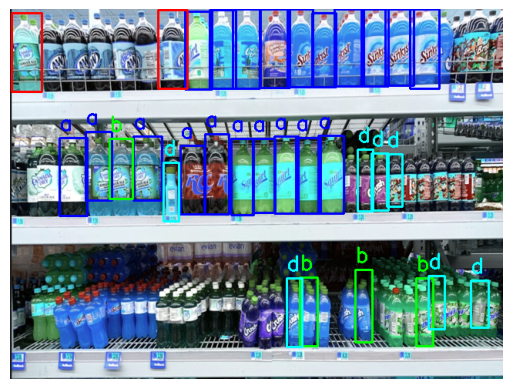


Total number of objects: 33


In [ ]:
# Install YOLOv8: pip install ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

object_image_path = '/content/Screenshot 2024-10-04 at 9.32.07 PM.png'
object_image = Image.open(object_image_path)
object_image = np.array(object_image.resize((640, 480)))  # Resize for YOLO model

# Convert the image to RGB if it has an alpha channel
if object_image.shape[2] == 4:
    object_image = cv2.cvtColor(object_image, cv2.COLOR_RGBA2RGB)

# Load a pre-trained YOLOv8 model (you can train your own if needed)
model = YOLO('yolov8n.pt')  # Load YOLOv8 small model for object detection


# Function to calculate the area of a bounding box
def calculate_area(bbox):
    x1, y1, x2, y2 = bbox
    return (x2 - x1) * (y2 - y1)

# Function to detect and group similar objects based on bounding box areas
def detect_and_group_objects(image):
    # Perform object detection
    results = model.predict(source=image)

    # Get the bounding box coordinates for detected objects
    detections = results[0].boxes.xyxy.numpy()  # Bounding box coordinates for detected objects

    # Calculate areas of the bounding boxes
    areas = [calculate_area(bbox) for bbox in detections]

    # Group objects based on similar areas (e.g., within a certain threshold)
    grouped_objects = {}
    label_counter = 0

    for i, area in enumerate(areas):
        assigned = False
        # Check if this area is close to any existing group
        for label, group in grouped_objects.items():
            if abs(group[0] - area) / max(area, group[0]) < 0.2:  # 20% threshold for area similarity
                group.append(i)  # Add the object to this group
                assigned = True
                break
        if not assigned:
            # Create a new group
            label_counter += 1
            label = chr(96 + label_counter)  # Convert to 'a', 'b', 'c', etc.
            grouped_objects[label] = [area, i]  # Start a new group

    return grouped_objects, detections

# Function to display the results and print the object counts
def display_and_print_results(image, grouped_objects, detections):
    image_copy = image.copy()

    # Assign different colors for each label
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255)]
    label_color_map = {}

    # Iterate over grouped objects
    for label, object_indices in grouped_objects.items():
        color = colors[len(label_color_map) % len(colors)]
        label_color_map[label] = color

        # Draw bounding boxes for each object in this group
        for obj_index in object_indices[1:]:
            bbox = detections[obj_index]
            x1, y1, x2, y2 = map(int, bbox)
            cv2.rectangle(image_copy, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image_copy, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Print the count of objects in this group
        print(f"Label '{label}': {len(object_indices[1:])} objects")

    # Display the image with labels
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Print the total number of objects
    total_objects = sum(len(object_indices[1:]) for object_indices in grouped_objects.values())
    print(f"\nTotal number of objects: {total_objects}")

# Detect and group objects based on their bounding box areas
grouped_objects, detections = detect_and_group_objects(object_image)

# Display the results and print the count
display_and_print_results(object_image, grouped_objects, detections)
